# Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train) 
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#tree.dot 파일 생성
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names , feature_names = iris.feature_names, impurity=True, filled=True) 

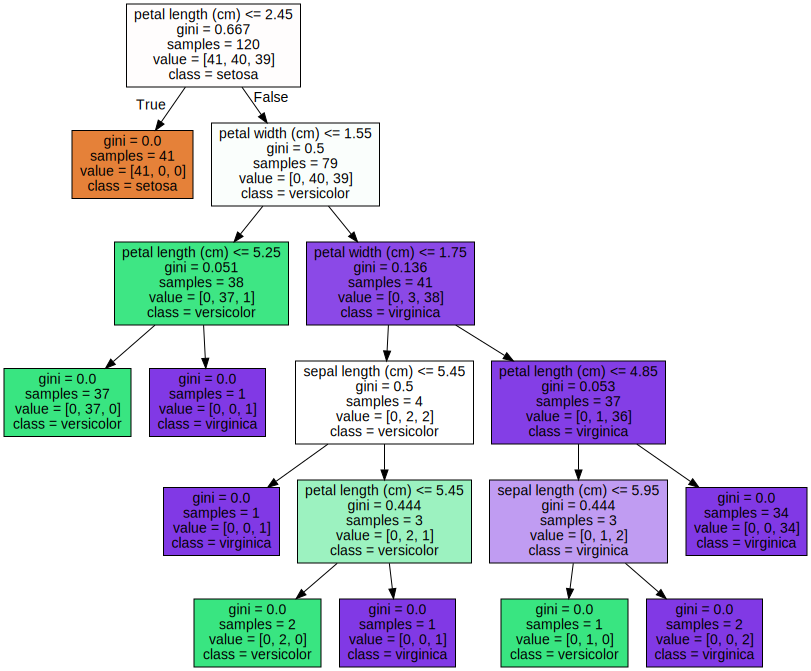

In [4]:
#tree.dot 파일 Graphviz가 시각화
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances
 [0.02500521 0.         0.55490281 0.42009198]
sepal length (cm) : 0.02500520941862888
sepal width (cm) : 0.0
petal length (cm) : 0.5549028149313102
petal width (cm) : 0.42009197565006084


<AxesSubplot:>

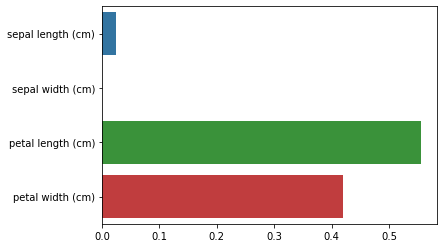

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances\n',dt_clf.feature_importances_)

for name, value in zip(iris.feature_names , dt_clf.feature_importances_):
    print(name,':', value)

sns.barplot(x = dt_clf.feature_importances_ , y = iris.feature_names) 

# 앙상블 학습 (Ensemble Learning)
- Voting (Hard Voting, Soft Voting)
- Bagging (Random Forest)
- Boosting (XGBoost, LightBGM)

## Voting
: 서로 다른 알고리즘을 가진 분류기를 결합

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [9]:
vo_clf.fit(X_train, y_train)
y_pred = vo_clf.predict(X_test)
accuracy_score(y_test, y_pred).round(4)

0.951

In [10]:
for i in lr_clf, knn_clf:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(i, ':', accuracy_score(y_test, y_pred))

LogisticRegression(solver='liblinear') : 0.9370629370629371
KNeighborsClassifier(n_neighbors=8) : 0.951048951048951


## Bagging (Bootstrap aggregating)
: 같은 분류기지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅 하는 방식

### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.965034965034965

In [13]:
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, min_samples_split=3)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.965034965034965

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8,16,24],
    'min_samples_leaf': [1,6,12],
    'min_samples_split': [2,8,16]
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2)
grid_cv.fit(X_train, y_train)

print('최적의 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)

최적의 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.9366197183098592


## Boosting
: 여러개의 weak learner를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

### GBM (Gradient Boosting Machine)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9790209790209791

### XGBoost (eXtra Gradient Boost)

In [17]:
from xgboost import XGBClassifier

In [18]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval2(y_test, y_pred, pred_proba):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print(confusion)
    print(f'정확도: {accuracy}, \n정밀도: {precision}, \n재현율: {recall} \nf1: {f1} \nAUC: {roc_auc}')

In [21]:
xgb_wrapper = XGBClassifier(n_estimators = 200, learning_rate = 0.05, max_depth = 3, eval_metric = 'logloss')
xgb_wrapper.fit(X_train, y_train, verbose=False)
y_pred = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval2(y_test, y_pred, pred_proba)

[[34  3]
 [ 2 75]]
정확도: 0.956140350877193, 
정밀도: 0.9615384615384616, 
재현율: 0.974025974025974 
f1: 0.967741935483871 
AUC: 0.995085995085995


In [22]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

In [23]:
xgb_wrapper = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, eval_metric="logloss")
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=False)
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval2(y_test , ws50_preds, ws50_pred_proba)

[[35  2]
 [ 4 73]]
정확도: 0.9473684210526315, 
정밀도: 0.9733333333333334, 
재현율: 0.948051948051948 
f1: 0.9605263157894737 
AUC: 0.991926991926992


### LightGBM

In [1]:
from lightgbm import LGBMClassifier

In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [26]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target

In [27]:
X = cancer_df.iloc[:,:-1]
y = cancer_df.iloc[:,-1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [29]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=True)

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

LGBMClassifier(learning_rate=0.05, n_estimators=400)

In [30]:
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

In [31]:
get_clf_eval2(y_test, preds, pred_proba)

[[34  3]
 [ 2 75]]
정확도: 0.956140350877193, 
정밀도: 0.9615384615384616, 
재현율: 0.974025974025974 
f1: 0.967741935483871 
AUC: 0.9877149877149878


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

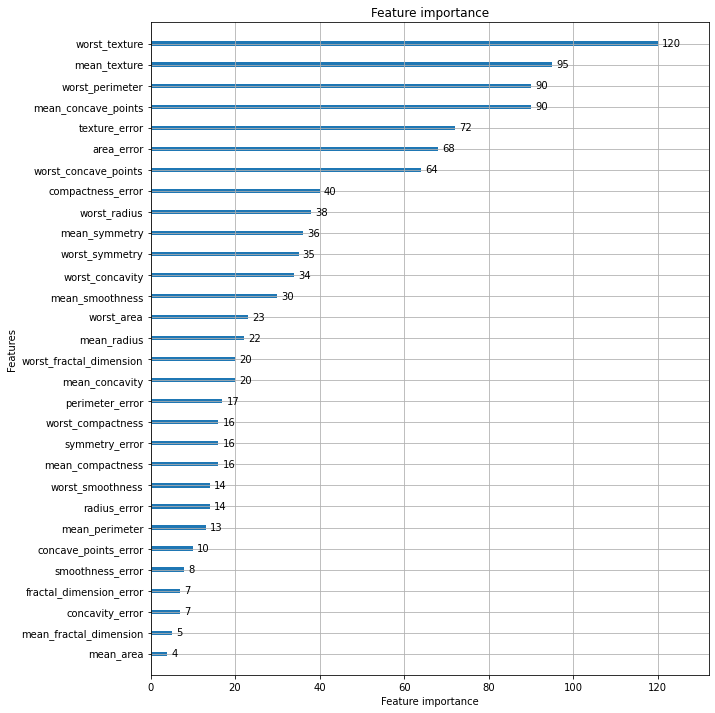

In [32]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax = ax)

# HyperOpt를 이용한 하이퍼 파라미터 튜닝
1. 입력 변수명과 입력값의 검색 공간(Search space) 생성
2. 목적 함수(Objective Function) 생성
3. 목적 함수의 최솟값을 반환하는 최적 입력 변숫값 유추

## HyperOpt 시작하기

In [33]:
from hyperopt import hp
from hyperopt import STATUS_OK

In [34]:
#변수명, 검색 공간 생성
search_space = {'x': hp.quniform('x',-10,10,1), 'y': hp.quniform('y',-15,15,1)}

In [35]:
#목적 함수 생성
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

In [36]:
#fmin()으로 최적의 입력 변숫값 x, y 값 찾기
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best1 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 5, trials = trial_val, rstate = np.random.default_rng(seed=0))
best2 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 200, trials = trial_val, rstate = np.random.default_rng(seed=0))
print(best1, best2)

100%|█████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 106.36trial/s, best loss: -300.0]
{'x': -4.0, 'y': 12.0} {'x': 0.0, 'y': 15.0}


## XGboost+HyperObt

In [37]:
cancer = load_breast_cancer()
X = features = cancer.data
y = labels = cancer.target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [39]:
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   } 

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
def objective_func(search_space):
    xgb_wrapper = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_wrapper, X_train, y_train, scoring='accuracy', cv=3)
    
    # 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK} 

In [42]:
from hyperopt import fmin, tpe, Trials
import warnings
warnings.filterwarnings('ignore')

trial_val = Trials()
best = fmin(fn=objective_func, space=xgb_search_space, algo=tpe.suggest, max_evals=50, trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [00:09<00:00,  5.05trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


In [43]:
#fmin()으로 추출된 최적 하이퍼 파라미터를 직접 XGBClassifier에 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=100,
                        colsample_bytree=0.54,
                        learning_rate=0.126,
                        max_depth=17,
                        min_child_weight=2
                       )

In [44]:
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric='logloss', eval_set=[(X_tr, y_tr),(X_val, y_val)], verbose=False)
y_pred = xgb_wrapper.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

### 분류 실습(Kaggle Santander Customer Satisfaction)

In [45]:
df = pd.read_csv('ml_data/train.csv')
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [46]:
#데이터량 10%로 줄이기
df = df.sample(frac=0.1, ignore_index=True)

In [47]:
df.TARGET.value_counts()/len(df)

0    0.963036
1    0.036964
Name: TARGET, dtype: float64

In [48]:
df['var3'].min()

-999999

In [49]:
df['var3'] = df['var3'].replace(-999999, 2)
df.drop('ID', axis = 1, inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 21.5 MB


In [51]:
X = features = df.iloc[:,:-1]
y = label = df.iloc[:,-1]

In [52]:
print(X.shape)
print(y.shape)

(7602, 369)
(7602,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
xgb_clf = XGBClassifier(n_estimator = 100, learning_rate = 0.05, random_state = 156)

In [56]:
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])
y_pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:,1]

[09:13:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.76527	validation_1-auc:0.65067
[1]	validation_0-auc:0.76642	validation_1-auc:0.65018
[2]	validation_0-auc:0.77610	validation_1-auc:0.68147
[3]	validation_0-auc:0.77618	validation_1-auc:0.68267
[4]	validation_0-auc:0.78294	validation_1-auc:0.68831
[5]	validation_0-auc:0.78309	validation_1-auc:0.68888
[6]	validation_0-auc:0.78316	validation_1-auc:0.68997
[7]	validation_0-auc:0.86039	validation_1-auc:0.76471
[8]	validation_0-auc:0.86008	validation_1-auc:0.76511
[9]	validation_0-auc:0.86855	validation_1-auc:0.76276
[10]	validation_0-auc:0.87103	validation_1-auc:0.76502
[11]	validation_0-auc:0.88747	validation_1-

In [57]:
accuracy_score(y_test, y_pred)

0.9598948060486522

In [58]:
roc_auc_score(y_test, pred_proba)

0.8252233247696042

In [59]:
#hyperOpt 적용

In [64]:
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

In [81]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    xgb_wrapper = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                                min_child_weight=int(search_space['min_child_weight']),
                                colsample_bytree=search_space['colsample_bytree'],
                                learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
        
        xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_wrapper.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    return -1 * np.mean(roc_auc_list)

In [135]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.78126	validation_1-auc:0.77994                                                                  
[1]	validation_0-auc:0.78603	validation_1-auc:0.78771                                                                  
[2]	validation_0-auc:0.78829	validation_1-auc:0.78205                                                                  
[3]	validation_0-auc:0.78914	validation_1-auc:0.78160                                                                  
[4]	validation_0-auc:0.79019	validation_1-auc:0.78058                                                                  
[5]	validation_0-auc:0.86221	validation_1-auc:0.81812                                                                  
[6]	validation_0-auc:0.88636	validation_1-auc:0.82849                                                                  
[7]	validation_0-auc:0.89221	validation_1-auc:0.82905                                                                  
[8]	validation_0-auc:0.89286	validation_

KeyboardInterrupt: 

In [68]:
#fmin()으로 추출된 최적 하이퍼 파라미터를 직접 XGBClassifier에 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=100, max_depth=5
                       , min_child_weight=6
                        , colsample_bytree=0.5749
                        , learning_rate=0.1514
                       )

In [70]:
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val, y_val)], verbose=False)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred_proba)

0.8279810026633984

## LightGBM+HyperOpt

In [71]:
from lightgbm import LGBMClassifier

In [72]:
lgbm_clf = LGBMClassifier(n_estimators=500)

In [73]:
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

[1]	training's auc: 0.879832	training's binary_logloss: 0.138769	valid_1's auc: 0.746925	valid_1's binary_logloss: 0.160536
[2]	training's auc: 0.913656	training's binary_logloss: 0.130132	valid_1's auc: 0.777045	valid_1's binary_logloss: 0.156291
[3]	training's auc: 0.935808	training's binary_logloss: 0.122559	valid_1's auc: 0.786617	valid_1's binary_logloss: 0.153323
[4]	training's auc: 0.942015	training's binary_logloss: 0.116754	valid_1's auc: 0.781333	valid_1's binary_logloss: 0.151199
[5]	training's auc: 0.94716	training's binary_logloss: 0.11232	valid_1's auc: 0.787014	valid_1's binary_logloss: 0.14977
[6]	training's auc: 0.948937	training's binary_logloss: 0.108234	valid_1's auc: 0.793358	valid_1's binary_logloss: 0.148672
[7]	training's auc: 0.953636	training's binary_logloss: 0.104339	valid_1's auc: 0.786576	valid_1's binary_logloss: 0.148047
[8]	training's auc: 0.957242	training's binary_logloss: 0.10058	valid_1's auc: 0.788363	valid_1's binary_logloss: 0.146921
[9]	training

LGBMClassifier(n_estimators=500)

In [74]:
pred_proba = lgbm_clf.predict_proba(X_test)[:,1]

In [75]:
roc_auc_score(y_test, pred_proba)

0.8115292148867468

In [76]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                   } 

In [82]:
def objective_func(search_space):
    lgbm_wrapper = LGBMClassifier(n_estimators=100, num_leaves = int(search_space['num_leaves']),
                                  max_depth=int(search_space['max_depth']),
                                  min_child_samples=int(search_space['min_child_samples']),
                                  subsample=search_space['subsample'],
                                  learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
        
        lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, lgbm_wrapper.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.896254	training's binary_logloss: 0.161875	valid_1's auc: 0.768976	valid_1's binary_logloss: 0.141111
[2]	training's auc: 0.897182	training's binary_logloss: 0.159425	valid_1's auc: 0.780757	valid_1's binary_logloss: 0.13975
[3]	training's auc: 0.898667	training's binary_logloss: 0.15722	valid_1's auc: 0.791802	valid_1's binary_logloss: 0.138625
[4]	training's auc: 0.899696	training's binary_logloss: 0.155195	valid_1's auc: 0.79259	valid_1's binary_logloss: 0.137587
[5]	training's auc: 0.90003	training's binary_logloss: 0.153321	valid_1's auc: 0.80298	valid_1's binary_logloss: 0.136731
[6]	training's auc: 0.901224	training's binary_logloss: 0.151587	valid_1's auc: 0.792002	valid_1's binary_logloss: 0.135904
[7]	training's auc: 0.901388	training's binary_logloss: 0.149983	valid_1's auc: 0.811797	valid_1's binary_logloss: 0.135136
[8]	training's auc: 0.903488	training's binary_logloss: 0.148476	valid_1's auc: 0.817917	valid_1's binary_logloss: 0.134099
[9]	training'

In [83]:
#fmin()으로 추출된 최적 하이퍼 파라미터를 직접 XGBClassifier에 인자로 입력
lgbm_wrapper = LGBMClassifier(n_estimators=100, num_leaves=41,
                              max_depth=121,
                              min_child_weight=69,
                              subsample=0.91489,
                              learning_rate=0.08592
                       )

In [80]:
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val, y_val)], verbose=False)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred_proba)

0.7225351780705683

### 분류 실습(Kaggle Credit Card Fraud Detection)

In [229]:
import pandas as pd

In [105]:
card = pd.read_csv("ml_data/creditcard.csv")
card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [106]:
#Time 칼럼 삭제
card = card.drop('Time', axis = 1)

In [107]:
#Dataset 분리
from sklearn.model_selection import train_test_split
features = card.iloc[:,:-1]
labels = card.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0, stratify=labels) #y_train, y_test의 레이블값 분포도를 동일하게 만든다

In [108]:
#모델 생성, fit, predict: LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:,1]

In [109]:
#평가 evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval2(y_test, y_pred, pred_proba):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print(confusion)
    print(f'정확도: {accuracy}, \n정밀도: {precision}, \n재현율: {recall} \nf1: {f1} \nAUC: {roc_auc}')
    
get_clf_eval2(y_test, preds, preds_proba)

[[85281    14]
 [   57    91]]
정확도: 0.99916903666772, 
정밀도: 0.8666666666666667, 
재현율: 0.6148648648648649 
f1: 0.7193675889328064 
AUC: 0.9703677855709042


In [110]:
#모델 생성, fit, predict: LGBMClassifier
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
preds_proba = lgbm_clf.predict_proba(X_test)[:,1]

In [111]:
#평가 evaluate
get_clf_eval2(y_test, preds, preds_proba)

[[85290     5]
 [   36   112]]
정확도: 0.9995201479348805, 
정밀도: 0.9572649572649573, 
재현율: 0.7567567567567568 
f1: 0.8452830188679246 
AUC: 0.9790335766330842


#### 표준화 후 적용

In [114]:
#표준화 하기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
card['Amount'] = scaler.fit_transform(card['Amount'].values.reshape(-1,1))

In [121]:
#Dataset 분리
from sklearn.model_selection import train_test_split
features = card.iloc[:,:-1]
labels = card.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0) #비율

#모델 생성, fit, predict: LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:,1]
#평가 evaluate
print(get_clf_eval2(y_test, preds, preds_proba))

#모델 생성, fit, predict: LGBMClassifier
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
preds_proba = lgbm_clf.predict_proba(X_test)[:,1]
#평가 evaluate
print(get_clf_eval2(y_test, preds, preds_proba))

[[85284    12]
 [   56    91]]
정확도: 0.999204147794436, 
정밀도: 0.883495145631068, 
재현율: 0.6190476190476191 
f1: 0.728 
AUC: 0.9689625052797334
None
[[85288     8]
 [   29   118]]
정확도: 0.9995669627705019, 
정밀도: 0.9365079365079365, 
재현율: 0.8027210884353742 
f1: 0.8644688644688644 
AUC: 0.9828868050690545
None


In [173]:
card = pd.read_csv('ml_data/creditcard.csv')

In [174]:
#로그 변환 후 적용
card.drop(['Time'], axis = 1, inplace=True)
card['Amount'] = np.log1p(card['Amount'])
fraud = card[card['Class'] == 1]

In [175]:
fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,6.272877,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,5.484506,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,4.094345,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,0.693147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.968708,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.565314,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,4.368054,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,5.505332,1


#### 이상치 제거 후 적용

In [176]:
pct75 =fraud['V14'].quantile(0.75)
pct25 =fraud['V14'].quantile(0.25)

IQR = pct75 - pct25
IQR

5.409902115485521

In [177]:
upper_out = pct75 + 1.5 * IQR
under_out = pct25 - 1.5 * IQR

cond1 = fraud['V14'] >= upper_out
cond2 = fraud['V14'] <= under_out
outlier = fraud.V14[cond1 | cond2] 

In [178]:
outlier

8296   -19.214325
8615   -18.822087
9035   -18.493773
9252   -18.049998
Name: V14, dtype: float64

In [179]:
outlier.index

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [184]:
card.drop(index = outlier.index, axis = 0, inplace=True)

In [187]:
card['V14'].min()

-18.392091495673

#### Over Sampling

In [188]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [192]:
#LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train_over, y_train_over)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:,1]
print(get_clf_eval2(y_test, preds, preds_proba))

#LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train_over, y_train_over)
preds = lgbm_clf.predict(X_test)
preds_proba = lgbm_clf.predict_proba(X_test)[:,1]
print(get_clf_eval2(y_test, preds, preds_proba))

[[83195  2101]
 [   12   135]]
정확도: 0.975270063082991, 
정밀도: 0.06037567084078712, 
재현율: 0.9183673469387755 
f1: 0.11330255979857323 
AUC: 0.9839677547064595
None
[[85279    17]
 [   27   120]]
정확도: 0.9994850368081645, 
정밀도: 0.8759124087591241, 
재현율: 0.8163265306122449 
f1: 0.8450704225352113 
AUC: 0.9672983125908401
None


# 스태킹 앙상블 (Stacking Ensemble)

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

X_data = cancer.data
y_label = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100) 
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test) 
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
pred = pred.T

lr_final = LogisticRegression(C=10)
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('정확도:', accuracy_score(y_test, final))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561
정확도: 0.9736842105263158
